<a href="https://colab.research.google.com/github/SushP07/Machine-Learning/blob/main/HandWrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FULLY CONNECTED LAYER HAND WRITTEN DIGIT RECOGNITION


In [5]:
import tensorflow as tf

In [6]:
!pip install mitdeeplearning
import mitdeeplearning as mdl





     |████████████████████████████████| 2.1 MB 5.4 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115442 sha256=12d869385f8ea482a8e0699c6f92004f1e0115c610b099c2798b242eea82165e
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [8]:
# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

AssertionError: ignored

In [10]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)


In [11]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)

<Figure size 720x720 with 0 Axes>

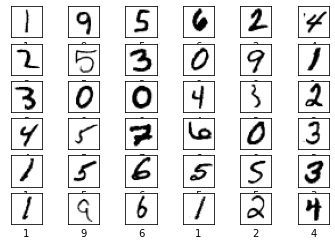

In [12]:
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])


In [13]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # '''TODO: Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation=tf.nn.relu),

      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
      
  ])
  return fc_model

model = build_fc_model()

In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
BATCH_SIZE = 64
EPOCHS = 10

history =model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2,
   validation_data=(test_images,test_labels))

Epoch 1/10
938/938 - 4s - loss: 0.3671 - accuracy: 0.8978 - val_loss: 0.2217 - val_accuracy: 0.9380 - 4s/epoch - 4ms/step
Epoch 2/10
938/938 - 3s - loss: 0.1971 - accuracy: 0.9436 - val_loss: 0.1653 - val_accuracy: 0.9527 - 3s/epoch - 3ms/step
Epoch 3/10
938/938 - 3s - loss: 0.1505 - accuracy: 0.9574 - val_loss: 0.1341 - val_accuracy: 0.9611 - 3s/epoch - 3ms/step
Epoch 4/10
938/938 - 3s - loss: 0.1222 - accuracy: 0.9651 - val_loss: 0.1183 - val_accuracy: 0.9642 - 3s/epoch - 3ms/step
Epoch 5/10
938/938 - 3s - loss: 0.1037 - accuracy: 0.9711 - val_loss: 0.1052 - val_accuracy: 0.9690 - 3s/epoch - 3ms/step
Epoch 6/10
938/938 - 3s - loss: 0.0897 - accuracy: 0.9748 - val_loss: 0.0968 - val_accuracy: 0.9706 - 3s/epoch - 3ms/step
Epoch 7/10
938/938 - 3s - loss: 0.0789 - accuracy: 0.9779 - val_loss: 0.0940 - val_accuracy: 0.9720 - 3s/epoch - 3ms/step
Epoch 8/10
938/938 - 3s - loss: 0.0708 - accuracy: 0.9799 - val_loss: 0.0848 - val_accuracy: 0.9746 - 3s/epoch - 3ms/step
Epoch 9/10
938/938 - 3s 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print('Test Loss:', test_loss)
print('Test accuracy:', test_acc)


313/313 - 0s - loss: 0.0787 - accuracy: 0.9769 - 415ms/epoch - 1ms/step
Test Loss: 0.07874737679958344
Test accuracy: 0.9768999814987183


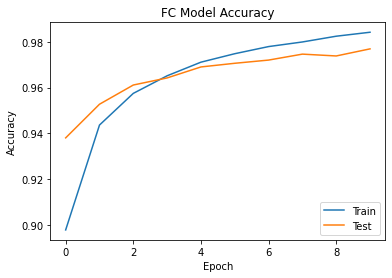

In [18]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('FC Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

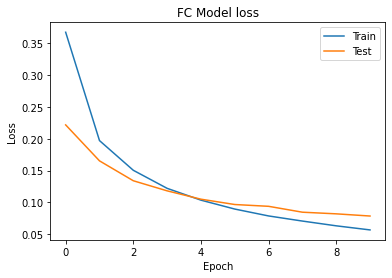

In [45]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('FC Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

In [20]:
pip install visualkeras

     |████████████████████████████████| 992 kB 4.9 MB/s 


In [21]:
import visualkeras

In [22]:
visualkeras.layered_view(model) 

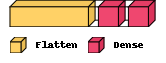

In [23]:
from PIL import ImageFont
visualkeras.layered_view(model, legend=True) 

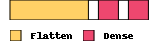

In [24]:
visualkeras.layered_view(model, legend=True, draw_volume=False)

# CONVOLUTIONAL NEURAL NETWORK 


In [25]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
                                     
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),

        
    ])
   

    return cnn_model

In [26]:
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

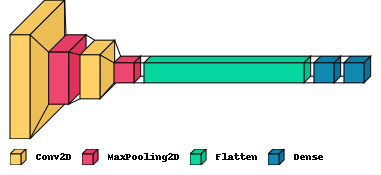

In [27]:
visualkeras.layered_view(cnn_model, legend=True) 

In [28]:
cnn_model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
history1 = cnn_model.fit(train_images,train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2,
   validation_data=(test_images,test_labels))
 

Epoch 1/10
938/938 - 48s - loss: 0.1801 - accuracy: 0.9466 - val_loss: 0.0529 - val_accuracy: 0.9827 - 48s/epoch - 51ms/step
Epoch 2/10
938/938 - 47s - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0433 - val_accuracy: 0.9849 - 47s/epoch - 50ms/step
Epoch 3/10
938/938 - 46s - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0358 - val_accuracy: 0.9871 - 46s/epoch - 50ms/step
Epoch 4/10
938/938 - 47s - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0275 - val_accuracy: 0.9905 - 47s/epoch - 50ms/step
Epoch 5/10
938/938 - 47s - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0304 - val_accuracy: 0.9897 - 47s/epoch - 50ms/step
Epoch 6/10
938/938 - 48s - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0341 - val_accuracy: 0.9892 - 48s/epoch - 51ms/step
Epoch 7/10
938/938 - 47s - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0357 - val_accuracy: 0.9900 - 47s/epoch - 50ms/step
Epoch 8/10
938/938 - 47s - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0335 - val_accuracy: 0.9907 - 47s/epoch - 50ms/step


In [30]:
test_loss1, test_acc1 = cnn_model.evaluate(test_images, test_labels)
test_acc1

313/313 [==============================] - 4s 14ms/step - loss: 0.0396 - accuracy: 0.9900


0.9900000095367432

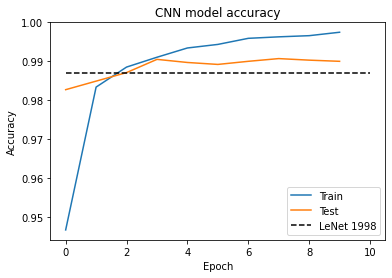

In [31]:
#plt.subplot(1,2,2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot([0,len(history1.history['accuracy'])],[0.987,0.987],'--k',label="LeNet 1998")
plt.title('CNN model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test','LeNet 1998'], loc='lower right')

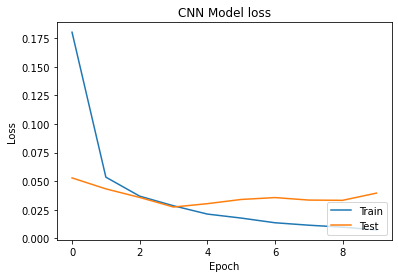

In [32]:

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

# OPTIMIZED CNN

In [33]:
from tensorflow.keras import regularizers
from keras.layers import Dropout

In [34]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')
train_datagen.fit(train_images)

In [35]:
def build_cnn_model_Optimized():
    cnn_model = tf.keras.Sequential([
                                     
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)),

        
    ])
    
    return cnn_model

In [36]:
cnn_model_optimized = build_cnn_model_Optimized()
# Initialize the model by passing some data through
cnn_model_optimized.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model_optimized.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 64)        

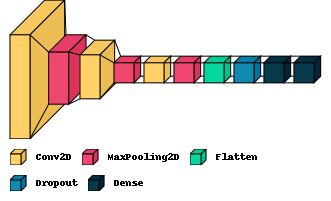

In [37]:
visualkeras.layered_view(cnn_model_optimized, legend=True) 

In [38]:
cnn_model_optimized.compile(tf.keras.optimizers.Adam(learning_rate=0.002),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [39]:
from keras.callbacks import EarlyStopping

In [40]:
history2 = cnn_model_optimized.fit(train_images,train_labels, batch_size=32, epochs=20, verbose=2,
   validation_data=(test_images,test_labels), callbacks = [EarlyStopping(monitor = 'val_loss', patience = 4)]) 


Epoch 1/20


KeyboardInterrupt: ignored

In [ ]:
test_loss2, test_acc2 = cnn_model_optimized.evaluate(test_images, test_labels)
test_acc2

In [ ]:
plt.subplot(2,1,1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

In [ ]:
plt.subplot(2,1,1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

In [41]:
predictions = cnn_model.predict(test_images)
predictions[0]

array([2.8132666e-10, 3.5743022e-10, 2.7388012e-12, 1.3792897e-09,
       2.3027622e-13, 4.1981115e-12, 1.5039088e-19, 1.0000000e+00,
       1.2192173e-09, 3.8532511e-11], dtype=float32)

Label of this digit is: 7


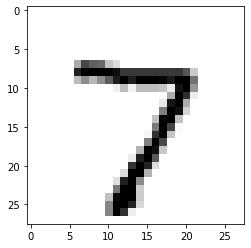

In [42]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

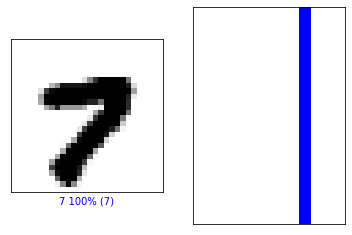

In [43]:
image_index = 79 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

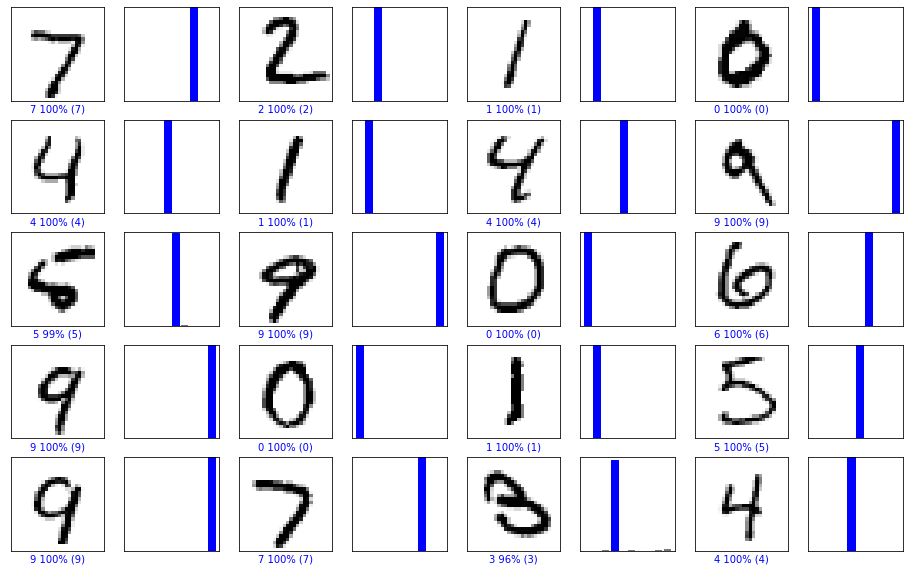

In [44]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)